# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_data = soup.find('table', class_='table')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
# This will create our list of lists for all the martian 
# weather measurements which we will later convert to a dataframe.
mars_weather_list = []

# Loop through the scraped data to create a list of rows
# Since we can't identify the data element uniquely by class,
# We will loop through using 'find_all' and grab the 0th, 1st, 2nd, etc. element
# and store each in an appropriate variable.
# Then we will create a list of the data elements for each row
# And finally append each row to our master mars_weather_list from above.
rows = mars_data.find_all(class_='data-row')
for row in rows:
    id = row.find_all('td')[0].text
    terrestrial_date = row.find_all('td')[1].text
    sol = row.find_all('td')[2].text
    ls = row.find_all('td')[3].text
    month = row.find_all('td')[4].text
    min_temp = row.find_all('td')[5].text
    pressure = row.find_all('td')[6].text
    mars_weather_row = [id,
                    terrestrial_date,
                    sol,
                    ls,
                    month,
                    min_temp,
                    pressure]
    mars_weather_list.append(mars_weather_row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# We created the mars_weather_list in the above cell, so here we just need to assign
# the correct column names.
mars_df = pd.DataFrame(mars_weather_list, columns=['id',
                                                    'terrestrial_date',
                                                    'sol',
                                                    'ls',
                                                    'month',
                                                    'min_temp',
                                                    'pressure'])

In [8]:
# Confirm DataFrame was created successfully
# To do this, we can just look at the ephemeral view
# of the dataframe by naming the variable that contains it. This
# will show the first few rows, the lsat few rows, the column names,
# and the shape of the dataframe (number of rows and columns).
mars_df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
# Code for this approach (of using a conversion dictionary) came from the following page:
# https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
convert_dict = {'id': int, 'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float}
mars_df = mars_df.astype(convert_dict)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
    

In [11]:
# Confirm type changes were successful by examining data types again
# Looking at the new dtypes, we can see that we ahve successfully updated
# the column types to integers, floats, and a datetime as appropriate.
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?

print(f"There are a total of {mars_df.groupby('month').size().shape[0]} distinct months listed")

There are a total of 12 distinct months listed


## Months on Mars
Based on the above 'group by' aggregation, there are twelve numbered months on mars contained within this data set. If, upon additional analysis, it appears that the data cover at least one martian year, we can conclude that this is a complete set of months, though there is no information provided as to how the various terrestrial days or Sols were split into months, and convention for Mars is to split the year into 24 months rather than 12. 

In [13]:
# 2. How many Martian days' worth of data are there?
print(f"There are a total of {mars_df.groupby('sol').size().shape[0]} distinct 'Sols' in our data set")

# Interestingly, since Mars does not have a large, dominant moon like Earth, there is no consensus on the number of (
# or duration of) months on Mars. In fact, while this dataset has twelve distinct months, most Martian
# calendars divide the Martian year into twenty-four months. This leaves approximately the same number
# of days in each month as Earth calendars, and accounts for Mars having a year that is roughly two times
# longer than Earth. I would have expected Curiosity to have adopted this convention since it has been
# used by JPL since 1966, when the Mariner probes were first being launched. It turns out that each mission
# involving a lander on Mars uses its own clock and calendar, typically starting on whatever Sol touchdown occurs
# (day 1), and continuing from there, with local siderial time used in most cases rather than MTC (Martian equivalent
# to UTC). Some missions have offset clocks for the local timezine, while others have not. The deisgnation of Sols
# or Martian days is important, and human schedules are often changed to match Martian rather than Earth days. Likewise,
# Martian seasons are well defined with a specific start time for northern hemisphere spring, summer, winter, and fall
# just as they are on Earth, but the counting of months is not at all consistent, with some missions using a 12 month
# calendar with three months in each season, while others use either an 18 month or 24 month calendar, but with no
# consistency as to when a given month (numbered or named) begins. It appears that the Curiosity mission adopted
# a 12 month calendar.


There are a total of 1867 distinct 'Sols' in our data set


## Number of Martian 'Sols'
After grouping on 'Sols' (to ensure there are no situations where we have more than one observation per martian day), there are a total of 1,867 separate martian days with measurements.

In [14]:
# 3. What is the average low temperature by month?
mars_df.groupby('month')['min_temp'].agg('mean')

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

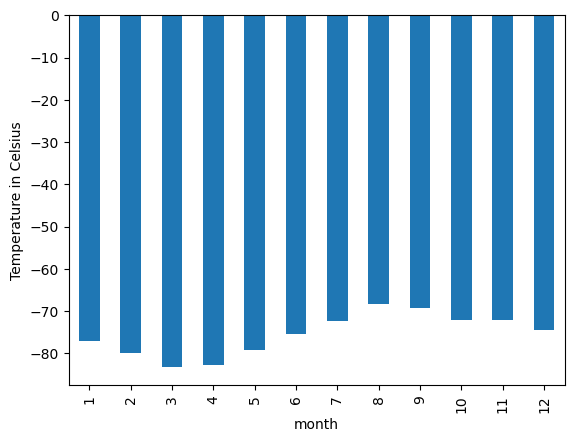

In [15]:
# Plot the average temperature by month
avg_temps_df = mars_df.groupby('month')['min_temp'].agg('mean')
ax = avg_temps_df.plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()

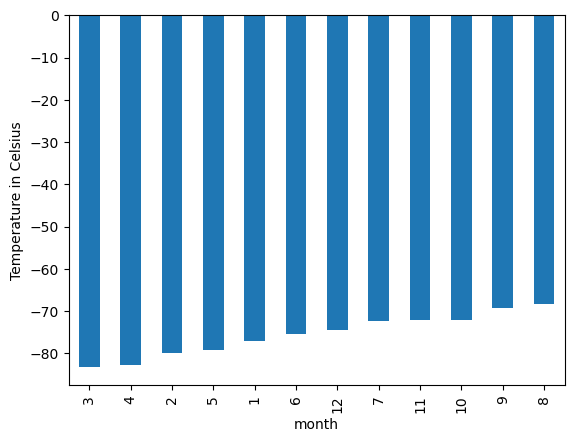

In [16]:
# Identify the coldest and hottest months in Curiosity's location
avg_temps_df = mars_df.groupby('month')['min_temp'].agg('mean').sort_values()
ax = avg_temps_df.plot(kind='bar')
plt.ylabel('Temperature in Celsius')
plt.show()

## Analysis of Average Temperatures by Month Visualizations and Data
Based upon the above data and graphs, month '8' has the highest average temperature at -68 degrees Celsius, and month '3' has the lowest average temperature at -83 degrees Celsius.

In [17]:
# 4. Average pressure by Martian month
avg_pressure_df = mars_df.groupby('month')['pressure'].agg('mean').sort_index()
avg_pressure_df

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

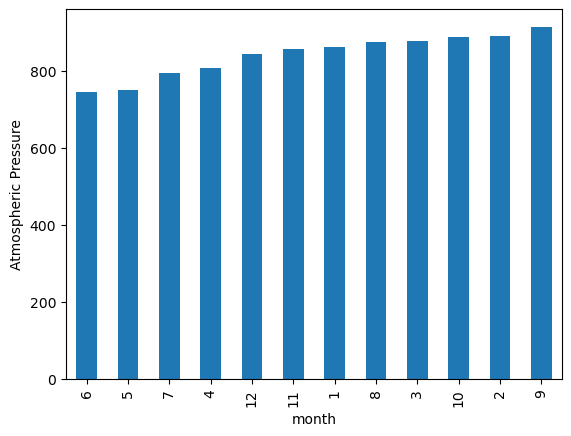

In [18]:
# Plot the average pressure by month
avg_pressure_df = mars_df.groupby('month')['pressure'].agg('mean').sort_values()
ax = avg_pressure_df.plot(kind='bar')
plt.ylabel('Atmospheric Pressure')
plt.show()

## Average pressure by Month Analysis
Based upon the data collected by Curiosity, pressure on Mars varied pretty significantly over time, with the lowest pressures occuring during months five, six, and seven at roughly 750-800 Pascals, and the highest pressure being over 900 Pascals in month nine. That is a pressure difference of over 20% (913/745 = 1.23) from the lowest pressure month to the highest. This is a much larger fluctuation than is seen on Earth where pressure can vary somewhat from day to day, but is usually within two percent or so from one month or one season to the next. Of course, the observed values of approximately 800 Pascals are less than one percent of Earth's typical value of 101,000 Pascals. 


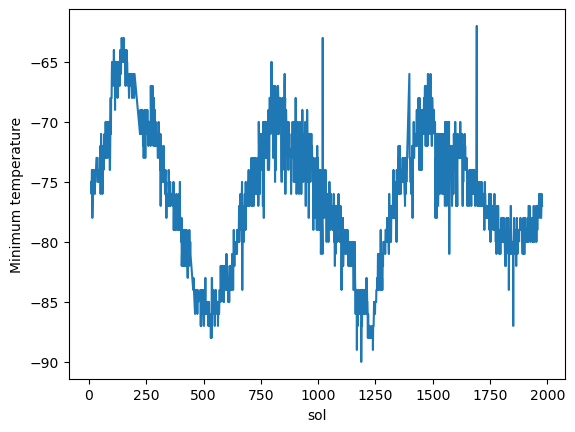

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_df_sols = mars_df[['sol', 'min_temp']]
mars_df_sols.set_index('sol', drop=True, inplace=True)
ax = mars_df_sols.plot(y='min_temp', legend=False)
plt.ylabel('Minimum temperature')
plt.show()

## Martian Year
Assuming that Mars has seasonal variations, just like Earth, that can be observed year over year, average temperatures should follow an approximate sine wave withone year corresponding to the difference between peaks (or the difference between valleys). Using the above graph, it appears that one summer had a maximum temperature on Sol 150, with the next max temp being at Sol 780 and the next at Sol 1500 or so. So two Martian years took approximately 1,350 Sols (1500-150), so one year would be half that or about 675 Sols. Looking up the actual value gives 668 Sols, so our visualization closely matches the actual duration for a Martina year in Sols.

# Summary Analysis

As described above, the coldest minimum temperatures on Mars occurred in month 3 with an average minimum temperature of -83C. The warmest month in our data set was month 8 with an average minimum temperature of -68C. Of course, our data do not include high temperatures, so while these temps appear very cold compared to most location on Earth, it is possible that high temps during the summer time are much warmer. In fact, Martian high temps in the summer can reach 20C/70F which would feel quite pleasant! Due to the thin Martian atmosphere and lack of cloud cover, though, temps always fluctuate significantly throghout the day, so a day with a high temp of 20C might have a low temp of -60C. The above information is sourced from https://science.nasa.gov/mars/facts/.

Atmospheric pressure on mars varies much more stronlgy from one month to the next on Mars when compared to Earth with up to a 20% variation. The observed month with the lowest pressure was month 6 and the observed month with the highest pressure was month 9. Both months had atmospheric pressures less than 1% of Earth's at roughly 800 Pascals. 

From looking at the above graph (measured in Martian Sols), the distance between two peaks (two years) is roughly 1,350 Sols (Sol 150 to Sol 1500), so half that would correspond to one martian year or 675 Sols. The website https://science.nasa.gov/mars/facts/ lists a martian year at 670 Sols, so our observed value of 675 is a very close match. This corresponds to an estimated value of 693 Earth days (1.0274 Sols per Day) where the accpted value is 687 Earth days, again, very close. 

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
mars_df.to_csv('Resources/mars_data.csv', encoding='utf-8', index=False)


In [21]:
browser.quit()